<a href="https://colab.research.google.com/github/BEST-PK/DPDM2024/blob/main/DPDM_2024_Exam_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ข้อสอบกลางภาค ข้อที่ 2**

**นายพุทธรักษ์  คัชภูทัศน์  675020013-6**

# **โจทย์**


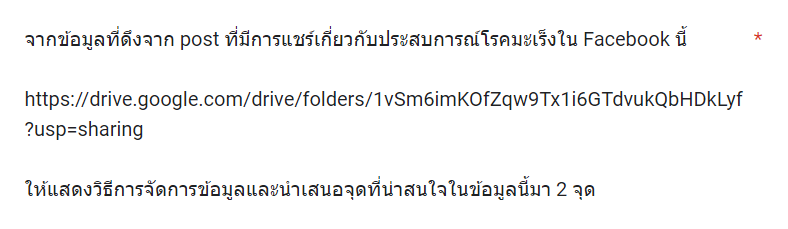

# **1. Data Exploration**


##**Get data**
`ข้อมูลที่ดึงจาก post ที่มีการแชร์เกี่ยวกับประสบการณ์โรคมะเร็งใน Facebook`

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from IPython.display  import HTML
import matplotlib.pyplot as plt

In [ ]:
cancer_post_data = pd.read_csv('/content/drive/MyDrive/Data_Exam2_DPDM/Data_Docter_ศ.นพ.ชวลิต.csv')
cancer_post_data

,name,comments,ยอดไลค์,จำนวนการตอบกลับ
0,ศ.นพ.ชวลิต ศูนย์มะเร็ง รพ.จุฬาลงกรณ์,กดที่ลิงค์นี้เพื่อเข้าไปอ่านคอมเม้นของโพสต์ครั...,456,3
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70
2,วาสนา คุ้มจิตต์,แม่เป็นมะเร็งขั้วปอด ลามขึ้นสมองค่ะ เริ่มแรกที...,402,11
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูก Osteosarcomaช่วงเข่า อา...,480,5
...,...,...,...,...
1648,Fear Q'bick,Jitladda Thonglukkeaw มาแชเร้ว ได้บุนนะ,0,0
1649,Toei Nittiya,Kamta Auttakan,0,0
1650,Ouiaii Promsuan,อนุชา มีลาภ,0,0
1651,Thanyalak Banboo,Na Nat Fari Kawa II Herbara Binti Abdullah Ras...,0,0


##**ตรวจสอบ Attributes**
**`ชุดข้อมูลประกอบด้วย 4 attributes `**
1.   ชื่อผู้ใช้งาน (name)
2.   เนื้อหาของโพสต์ (comments)
3.   ยอดไลค์
4.   จำนวนการตอบกลับ




In [ ]:
cancer_post_data.dtypes

,0
name,object
comments,object
ยอดไลค์,int64
จำนวนการตอบกลับ,int64


## **ตรวจสอบจำนวน Records**
**`ชุดข้อมูลมีทั้งสิ้น 1653 records`**

In [ ]:
cancer_post_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             1653 non-null   object
 1   comments         1653 non-null   object
 2   ยอดไลค์          1653 non-null   int64 
 3   จำนวนการตอบกลับ  1653 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 51.8+ KB


##**ตรวจสอบ Missing**
**`ไม่พบ missing values`**




In [ ]:
#เช็คจำนวน missing ในแต่ละตัวแปร
cancer_post_data.isna().sum()

,0
name,0
comments,0
ยอดไลค์,0
จำนวนการตอบกลับ,0


# **2. Data Preprocessing**

###**แก้ไขชื่อตัวแปร**
โดยกำหนดชื่อตัวแปรให้สอดคล้องกับลักษณะข้อมูล

1.   ชื่อผู้ใช้งาน = Account Name
2.   เนื้อหาของโพสต์ = Contents
3.   ยอดไลค์ = Number of Likes
3.   จำนวนการตอบกลับ =  Number of Replies

In [ ]:
cancer_post_data = cancer_post_data.rename(
                               columns={ 'name': 'Account Name',
                                            'comments': 'Contents',
                                             'ยอดไลค์': 'Number of Likes',
                                             'จำนวนการตอบกลับ': 'Number of Replies'})
cancer_post_data

,Account Name,Contents,Number of Likes,Number of Replies
0,ศ.นพ.ชวลิต ศูนย์มะเร็ง รพ.จุฬาลงกรณ์,กดที่ลิงค์นี้เพื่อเข้าไปอ่านคอมเม้นของโพสต์ครั...,456,3
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70
2,วาสนา คุ้มจิตต์,แม่เป็นมะเร็งขั้วปอด ลามขึ้นสมองค่ะ เริ่มแรกที...,402,11
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูก Osteosarcomaช่วงเข่า อา...,480,5
...,...,...,...,...
1648,Fear Q'bick,Jitladda Thonglukkeaw มาแชเร้ว ได้บุนนะ,0,0
1649,Toei Nittiya,Kamta Auttakan,0,0
1650,Ouiaii Promsuan,อนุชา มีลาภ,0,0
1651,Thanyalak Banboo,Na Nat Fari Kawa II Herbara Binti Abdullah Ras...,0,0


###**กำจัด punctuations**
ลบอักขระพิเศษ ได้แก่ !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ออกจากข้อความในตัวแปร Contents

In [ ]:
import string
Punc = string.punctuation
Punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
cancer_post_data

,Account Name,Contents,Number of Likes,Number of Replies
0,ศ.นพ.ชวลิต ศูนย์มะเร็ง รพ.จุฬาลงกรณ์,กดที่ลิงค์นี้เพื่อเข้าไปอ่านคอมเม้นของโพสต์ครั...,456,3
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70
2,วาสนา คุ้มจิตต์,แม่เป็นมะเร็งขั้วปอด ลามขึ้นสมองค่ะ เริ่มแรกที...,402,11
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูก Osteosarcomaช่วงเข่า อา...,480,5
...,...,...,...,...
1648,Fear Q'bick,Jitladda Thonglukkeaw มาแชเร้ว ได้บุนนะ,0,0
1649,Toei Nittiya,Kamta Auttakan,0,0
1650,Ouiaii Promsuan,อนุชา มีลาภ,0,0
1651,Thanyalak Banboo,Na Nat Fari Kawa II Herbara Binti Abdullah Ras...,0,0


In [ ]:
for column in cancer_post_data.columns:
    if cancer_post_data[column].dtype == 'object':
        cancer_post_data[column] = cancer_post_data[column].str.replace(f'[{Punc}]', '', regex=True)
cancer_post_data

,Account Name,Contents,Number of Likes,Number of Replies
0,ศนพชวลิต ศูนย์มะเร็ง รพจุฬาลงกรณ์,กดที่ลิงค์นี้เพื่อเข้าไปอ่านคอมเม้นของโพสต์ครั...,456,3
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70
2,วาสนา คุ้มจิตต์,แม่เป็นมะเร็งขั้วปอด ลามขึ้นสมองค่ะ เริ่มแรกที...,402,11
3,Wansook Chompoo Ploy,มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอา...,1600,44
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูก Osteosarcomaช่วงเข่า อา...,480,5
...,...,...,...,...
1648,Fear Qbick,Jitladda Thonglukkeaw มาแชเร้ว ได้บุนนะ,0,0
1649,Toei Nittiya,Kamta Auttakan,0,0
1650,Ouiaii Promsuan,อนุชา มีลาภ,0,0
1651,Thanyalak Banboo,Na Nat Fari Kawa II Herbara Binti Abdullah Ras...,0,0


### **กรอง record ที่เกี่ยวกับการแชร์ประสบการณ์โรคมะเร็ง**

ทำการกรอกเอาเฉพาะ records ใน DataFrame cancer_post_data ที่คอลัมน์ 'Contents' มีข้อความที่ประกอบด้วยคำว่า 'มะเร็ง' หรือ 'cancer'

**`จะเห็นได้ว่ามีทั้งสิ้น 548 records ที่ข้อความใน Contents มีคำว่า  'มะเร็ง' หรือ 'cancer'`**

In [ ]:
cancer_post_data=cancer_post_data[cancer_post_data['Contents'].str.contains("มะเร็ง|cancer")]
cancer_post_data

,Account Name,Contents,Number of Likes,Number of Replies
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70
2,วาสนา คุ้มจิตต์,แม่เป็นมะเร็งขั้วปอด ลามขึ้นสมองค่ะ เริ่มแรกที...,402,11
3,Wansook Chompoo Ploy,มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอา...,1600,44
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูก Osteosarcomaช่วงเข่า อา...,480,5
5,Ize Atitya,ลูกสาว 5 ขวบ เป็นมะเร็งสมองคะ ไม่มีอาการอะไร น...,1500,23
...,...,...,...,...
1639,Amika Phs,แม่เป็นมะเร็งตับค่ะ เพราะก่อนหน้านั้นแม่ทำงานร...,0,0
1641,Woranaphatchon Phupho,ไม่ได้เป็นเองแต่ขอเล่าของคุณตาค่ะ เป็นมะเร็งตอ...,0,0
1643,Narisa Mohthong,พ่อเป็น มะเร็งปอด ระยะ4 ยังไม่แพร่กระจายแบบไม่...,0,0
1644,Chanisara Hom,พ่อเป็นมะเร็งลำไส้ชอบกินอาหารสุกๆ ดิบค่ะ ขับถ่...,0,0


In [ ]:
cancer_post_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 1 to 1646
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Account Name       548 non-null    object
 1   Contents           548 non-null    object
 2   Number of Likes    548 non-null    int64 
 3   Number of Replies  548 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 21.4+ KB


##**STOP WORD**

In [ ]:
!pip install pythainlp
from pythainlp import word_tokenize
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [ ]:
stopwords = ["ครับ","ค่ะ","นะคะ","นะ","ครับผม","จ้า","เลย","อ่ะ","อะ","อ่า","เอ่อ","เออ","คือ","ค่ะ","คะ","อืม","อือ","ออ","เอิ่ม"]
stopwords.extend(["ใน","หลัง","ที่","บน","ดูเพิ่มเติม","ใต้","บน"])

In [ ]:
def remove_stopwords(text):
  tokens = word_tokenize(text,engine='newmm',keep_whitespace=False)
  tokens_filtered = [word for word in tokens if word not in stopwords]
  return " ".join(tokens_filtered)

cancer_post_data['Contents'] = cancer_post_data['Contents'].apply(remove_stopwords)
cancer_post_data['Contents'] = cancer_post_data['Contents'].str.replace(' ', '')
cancer_post_data['Contents']

,Contents
1,เป็นมะเร็งลำไส้ใหญ่ระยะ3ตอนอายุ26พฤติกรรมคิดว่...
2,แม่เป็นมะเร็งขั้วปอดลามขึ้นสมองเริ่มแรกเป็นแม่...
3,มะเร็งปากมดลูกระยะCINlllเกือบเข้าระยะ1ตอนอายุ3...
4,ลูกสาวเป็นมะเร็งกระดูกOsteosarcomaช่วงเข่าอากา...
5,ลูกสาว5ขวบเป็นมะเร็งสมองไม่มีอาการอะไรนอกจากน้...
...,...
1639,แม่เป็นมะเร็งตับเพราะก่อนหน้านั้นแม่ทำงานร้านอ...
1641,ไม่ได้เป็นเองแต่ขอเล่าของคุณตาเป็นมะเร็งตอนอาย...
1643,พ่อเป็นมะเร็งปอดระยะ4ยังไม่แพร่กระจายแบบไม่รู้...
1644,พ่อเป็นมะเร็งลำไส้ชอบกินอาหารสุกๆดิบขับถ่ายเป็...


In [ ]:
cancer_post_data

,Account Name,Contents,Number of Likes,Number of Replies
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ระยะ3ตอนอายุ26พฤติกรรมคิดว่...,1400,70
2,วาสนา คุ้มจิตต์,แม่เป็นมะเร็งขั้วปอดลามขึ้นสมองเริ่มแรกเป็นแม่...,402,11
3,Wansook Chompoo Ploy,มะเร็งปากมดลูกระยะCINlllเกือบเข้าระยะ1ตอนอายุ3...,1600,44
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูกOsteosarcomaช่วงเข่าอากา...,480,5
5,Ize Atitya,ลูกสาว5ขวบเป็นมะเร็งสมองไม่มีอาการอะไรนอกจากน้...,1500,23
...,...,...,...,...
1639,Amika Phs,แม่เป็นมะเร็งตับเพราะก่อนหน้านั้นแม่ทำงานร้านอ...,0,0
1641,Woranaphatchon Phupho,ไม่ได้เป็นเองแต่ขอเล่าของคุณตาเป็นมะเร็งตอนอาย...,0,0
1643,Narisa Mohthong,พ่อเป็นมะเร็งปอดระยะ4ยังไม่แพร่กระจายแบบไม่รู้...,0,0
1644,Chanisara Hom,พ่อเป็นมะเร็งลำไส้ชอบกินอาหารสุกๆดิบขับถ่ายเป็...,0,0


## **ตรวจสอบใจความสำคัญของเนื้อหาที่โพสต์ในแต่ละ records**

**`เพื่อทำการดูว่าเเต่ละ records โพสต์แชร์ประสบการณ์โรคมะเร็งชนิดไหนเเละประเภทอะไร`**

**1. สร้าง  Data Dictionary ชื่อ Type_of_Cancer  เพื่อจัดกลุ่มชนิดของมะเร็งตามประเภทต่างๆ โดยแบ่งเป็น 9 กลุ่ม ต่อไปนี้**

1.   มะเร็งจากเซลล์เยื่อบุ (Carcinomas)
2.   มะเร็งจากเซลล์กล้ามเนื้อและกระดูก (Sarcomas)
3.   มะเร็งจากเซลล์เม็ดเลือด (Leukemias)
4.   มะเร็งจากเซลล์ระบบน้ำเหลือง (Lymphomas)
5.   มะเร็งจากเซลล์เนื้อเยื่อที่เป็นต่อม (Neuroendocrine Tumors)
6.   มะเร็งจากเซลล์ต้นกำเนิด (Germ Cell Tumors)
7.   มะเร็งจากเซลล์เม็ดสี (Melanomas)
8.   มะเร็งระบบประสาทส่วนกลาง (Central Nervous System Cancers)
9.   มะเร็งที่เกี่ยวข้องกับไขกระดูก (Myelomas)



In [ ]:
# ตัวแปรสำหรับเก็บชนิดของมะเร็งในแต่ละประเภท
Type_of_Cancer = {
    # ชนิดของมะเร็งจากเซลล์เยื่อบุ (Carcinomas)
    "Carcinomas": {
        "มะเร็งเต้านม",
        "มะเร็งปอด",
        "มะเร็งลำไส้",
        "มะเร็งตับ",
        "มะเร็งกระเพาะอาหาร",
        "มะเร็งกระเพาะ",
        "มะเร็งหลอดอาหาร",
        "มะเร็งขั้วกระเพาะอาหาร",
        "มะเร็งกระเพาะปัสสาวะ",
        "มะเร็งไต",
        "มะเร็งต่อมลูกหมาก",
        "มะเร็งผิวหนัง",
        "มะเร็งปากมดลูก",
        "มะเร็งเยื่อบุโพรงมดลูก",
        "มะเร็งโพรงมดลูก",
        "มะเร็งมดลูก",
        "มะเร็งช่องปาก",
        "มะเร็งปาก",
        "มะเร็งต่อมน้ำลาย",
        "มะเร็งโพรงจมูก",
        "มะเร็งตับอ่อน",
        "มะเร็งหลอดน้ำดี",
        "มะเร็งถุงน้ำดี",
        "มะเร็งท่อน้ำดี",
        "มะเร็งไทรอยด์",
         "มะเร็งต่อมไทรอยด์",
        "มะเร็งลิ้น",
        "มะเร็งโคนลิ้น",
        "มะเร็งต่อมทอนซิล",
        "มะเร็งกล่องเสียง",
        "มะเร็งขั้วปอด",
        "มะเร็งท่อรังไข่",
       "มะเร็งหลอดลม",
        "มะเร็งต่อมหมวกไต",
        "มะเร็งเนื้อเยื่อบุผิว",
        "มะเร็งลำคอ",
        "มะเร็งเนื้องอกตับ"
    },

    # ชนิดของมะเร็งจากเซลล์กล้ามเนื้อและกระดูก (Sarcomas)
    "Sarcomas": {
        "มะเร็งกระดูก",
        "มะเร็งกระดูกอ่อน",
        "มะเร็งกล้ามเนื้อเรียบ",
        "มะเร็งกล้ามเนื้อลาย",
        "มะเร็งจากเนื้อเยื่อไขมัน",
        "มะเร็งจากหลอดเลือด",
        "มะเร็งเนื้อเยื่ออ่อน",
        "มะเร็งผังผืดไขกระดูก"
    },

    # ชนิดของมะเร็งจากเซลล์เม็ดเลือด (Leukemias)
    "Leukemias": {
        "มะเร็งเม็ดเลือดขาว",
        "ลูคีเมีย",
        "มะเร็งเม็ดเลือด",
    },

    # ชนิดของมะเร็งจากเซลล์ระบบน้ำเหลือง (Lymphomas)
    "Lymphomas": {
        "มะเร็งต่อมน้ำเหลือง",
    },

    # ชนิดของมะเร็งจากเซลล์เนื้อเยื่อที่เป็นต่อม (Neuroendocrine Tumors)
    "Neuroendocrine Tumors": {
        "มะเร็งต่อมไร้ท่อ",
        "มะเร็งเซลล์ท่อน้ำดี" ,
        "มะเร็งเซลล์เนื้อเยื่อที่สร้างฮอร์โมน"
    },

    # ชนิดของมะเร็งจากเซลล์ต้นกำเนิด (Germ Cell Tumors)
    "Germ Cell Tumors": {
        "มะเร็งอัณฑะ",
        "มะเร็งรังไข่",
        "มะเร็งเซลล์ต้นกำเนิด"
    },

    # ชนิดของมะเร็งจากเซลล์เม็ดสี (Melanomas)
    "Melanomas": {
        "มะเร็งผิวหนัง",
        "มะเร็งเมลานิน",
        "มะเร็งเม็ดสี"
    },

    # ชนิดของมะเร็งระบบประสาทส่วนกลาง (Central Nervous System Cancers)
    "Central Nervous System Cancers": {
        "มะเร็งสมอง",
        "มะเร็งไขสันหลัง",
        "มะเร็งระบบประสาทส่วนกลาง",
        "มะเร็งต่อมไทรมัส"
    },

    # ชนิดของมะเร็งที่เกี่ยวข้องกับไขกระดูก (Myelomas)
"Myelomas": {
    "มะเร็งไขกระดูก"
}
}

**2. ตรวจสอบสาระสำคัญเนื้อหาของโพสต์ในเเต่ละ records ว่าแชร์ประสบการณ์เกี่ยวกับมะเร็งชนิดอะไร**

`โดยใช้การตรวจสอบ " word ใน Content กับ ชื่อโรค ใน Data Dic ของ Type_of_Cancer " `


จะทำการสร้าง colume เพิ่ม คือ

1.   Cancer Name : สำหรับเก็บชื่อโรคมะเร็งที่พบ
2.   Typed of Cance : สำหรับระบุประเภทของมะเร็ง

`หากพบ word ที่ตรงกับชื่อโรค Type_of_Cancer ก็จะเก็บชื่อโรคมะเร็งไว้ในตัวแปร Cancer Name`

` หากไม่พบ word ที่ตรงกับชื่อโรคมะเร็ง Type_of_Cancer ก็จะเเสดงค่า  "Unable to determine" หมายความว่า ไม่สามารถระบุชนิดของโรคมะเร็งได้จากเนื้อหาของโพสต์`










In [ ]:
# สร้าง list ว่างสำหรับเก็บชนิดของมะเร็งและ keyword
cancer_types = []
keywords = []

# วน loop ในแต่ละแถวของ DataFrame
for index, row in cancer_post_data.iterrows():
    content = row['Contents']
    found_type = None
    found_keyword = None

    # ตรวจสอบว่ามีคำที่เกี่ยวข้องกับชนิดของมะเร็งในเนื้อหาหรือไม่
    for cancer_type, keyword_set in Type_of_Cancer.items():
        for keyword in keyword_set:
            if keyword in content:
                found_type = cancer_type
                found_keyword = keyword
                break
        if found_type:
            break

    # เก็บชนิดของมะเร็งและ keyword ที่พบ
    cancer_types.append(found_type if found_type else "Unable to determine")
    keywords.append(found_keyword if found_keyword else "Unable to determine")

# เพิ่มคอลัมน์ Typed และ keyword ใน DataFrame
cancer_post_data['Cancer Name'] = keywords
cancer_post_data['Typed of Cancer'] = cancer_types
cancer_post_data


,Account Name,Contents,Number of Likes,Number of Replies,Cancer Name,Typed of Cancer
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ระยะ3ตอนอายุ26พฤติกรรมคิดว่...,1400,70,มะเร็งลำไส้,Carcinomas
2,วาสนา คุ้มจิตต์,แม่เป็นมะเร็งขั้วปอดลามขึ้นสมองเริ่มแรกเป็นแม่...,402,11,มะเร็งขั้วปอด,Carcinomas
3,Wansook Chompoo Ploy,มะเร็งปากมดลูกระยะCINlllเกือบเข้าระยะ1ตอนอายุ3...,1600,44,มะเร็งปากมดลูก,Carcinomas
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูกOsteosarcomaช่วงเข่าอากา...,480,5,มะเร็งกระดูก,Sarcomas
5,Ize Atitya,ลูกสาว5ขวบเป็นมะเร็งสมองไม่มีอาการอะไรนอกจากน้...,1500,23,มะเร็งสมอง,Central Nervous System Cancers
...,...,...,...,...,...,...
1639,Amika Phs,แม่เป็นมะเร็งตับเพราะก่อนหน้านั้นแม่ทำงานร้านอ...,0,0,มะเร็งตับ,Carcinomas
1641,Woranaphatchon Phupho,ไม่ได้เป็นเองแต่ขอเล่าของคุณตาเป็นมะเร็งตอนอาย...,0,0,มะเร็งลำคอ,Carcinomas
1643,Narisa Mohthong,พ่อเป็นมะเร็งปอดระยะ4ยังไม่แพร่กระจายแบบไม่รู้...,0,0,มะเร็งปอด,Carcinomas
1644,Chanisara Hom,พ่อเป็นมะเร็งลำไส้ชอบกินอาหารสุกๆดิบขับถ่ายเป็...,0,0,มะเร็งลำไส้,Carcinomas


**3. ตรวจสอบ records ที่ไม่สามารถไม่สามารถระบุชนิดของโรคมะเร็งได้จากเนื้อหาของโพสต์**

`มีทั้งหมด 64 records`




In [ ]:
cancer_post_data[cancer_post_data['Cancer Name']=='Unable to determine']

,Account Name,Contents,Number of Likes,Number of Replies,Cancer Name,Typed of Cancer
8,Varatchaya Thavanpongloed,แม่ตรวจเจอมะเร็งปี2554ไม่มีอาการเจ็บปวดใดๆแต่แ...,0,0,Unable to determine,Unable to determine
15,Pariyaphat K Panumphun,แม่มีปีกจมูกบวมแต่แข็ง1ข้างเป็นมานานไม่เจ็บไม่...,0,0,Unable to determine,Unable to determine
33,Tippanan Ploy Saetan,บ้านไม่มีใครเป็นมะเร็งคุณยายทุกคนแข็งแรงอายุยื...,29,12,Unable to determine,Unable to determine
56,หวาน หวาน,เป็นกันเยอะคนรอบตัวเสียเพราะมะเร็งเยอะมากเมื่อ...,8,2,Unable to determine,Unable to determine
62,KW VVilasinee,จะดีมากถ้าผู้ป่วยเป็นมะเร็งรักษาหายแล้วไม่มีเช...,0,2,Unable to determine,Unable to determine
...,...,...,...,...,...,...
729,กันย์ฤดี คำปุ้ยธนันท์ธร,คุณแม่เป็นมะเร็งลำใส่ท้องถูกต้องใช้ยาระบายประจ...,0,0,Unable to determine,Unable to determine
774,Khwansuda Netwong,แฟนทำctscanเจอเนื้องอกต่อมหมวกไตเมื่อวานแจ้งว่...,0,0,Unable to determine,Unable to determine
791,Kru Namphung Lemon,AreeyaAoyisaranukulสงสัยต้องไปตรวจมะเร็งเพิ่มก...,0,0,Unable to determine,Unable to determine
851,Wimontra Toopbutsa,สังเกตุเล็บความผิดปกติของอวัยวะภายในร่างกายแสด...,0,0,Unable to determine,Unable to determine


#**3. Report**

**จากตรวจสอบโพสต์ 548  records ที่มีข้อความเนื้อหาของโพสต์ ที่มีคำว่า 'มะเร็ง' หรือ 'cancer'**

    สามารถระบุชนิดของโรคมะเร็งได้จากเนื้อหาของโพสต์มีทั้งหมด 484 records
    และอีกไม่สามารถระบุชนิดของโรคมะเร็งได้จากเนื้อหาของโพสต์มีทั้งหมด 64 records

##**3.1) ผลการจำแนกโรคมะเร็งที่ถูกนำมาแชร์ประสบการณ์**

In [211]:
count_cancer=cancer_post_data[cancer_post_data['Cancer Name']!="Unable to determine"]['Cancer Name'].value_counts()

#มะเร็งที่พบมาก
max_value = count_cancer.max()
max_cancer = count_cancer[count_cancer == max_value]

#มะเร็งที่พบน้อย
min_value = count_cancer.min()
min_cancer = count_cancer[count_cancer == min_value]

print('---'*30,'มะเร็งที่พบมากที่สุด','---'*30)
print("มะเร็งที่คนเป็นมากที่สุด :", ', '.join(max_cancer.index))
print("จำนวนโพสต์ที่แชร์ประสบการณ์ :", max_value, "โพสต์")
print('---'*30,'มะเร็งที่พบน้อยที่สุด','---'*30)
print("มะเร็งที่คนเป็นน้อยที่สุด :", ', '.join(min_cancer.index))
print("จำนวนโพสต์ที่แชร์ประสบการณ์ :", min_value, "โพสต์")

------------------------------------------------------------------------------------------ มะเร็งที่พบมากที่สุด ------------------------------------------------------------------------------------------
มะเร็งที่คนเป็นมากที่สุด : มะเร็งเต้านม
จำนวนโพสต์ที่แชร์ประสบการณ์ : 64 โพสต์
------------------------------------------------------------------------------------------ มะเร็งที่พบน้อยที่สุด ------------------------------------------------------------------------------------------
มะเร็งที่คนเป็นน้อยที่สุด : มะเร็งต่อมหมวกไต, มะเร็งไขกระดูก, มะเร็งปาก, มะเร็งต่อมไทรมัส, มะเร็งขั้วกระเพาะอาหาร, มะเร็งเนื้อเยื่อบุผิว, มะเร็งเนื้อเยื่ออ่อน, มะเร็งต่อมทอนซิล, มะเร็งหลอดลม, มะเร็งผังผืดไขกระดูก, มะเร็งท่อรังไข่, มะเร็งขั้วปอด, มะเร็งอัณฑะ, มะเร็งเม็ดสี, มะเร็งลำคอ
จำนวนโพสต์ที่แชร์ประสบการณ์ : 1 โพสต์


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

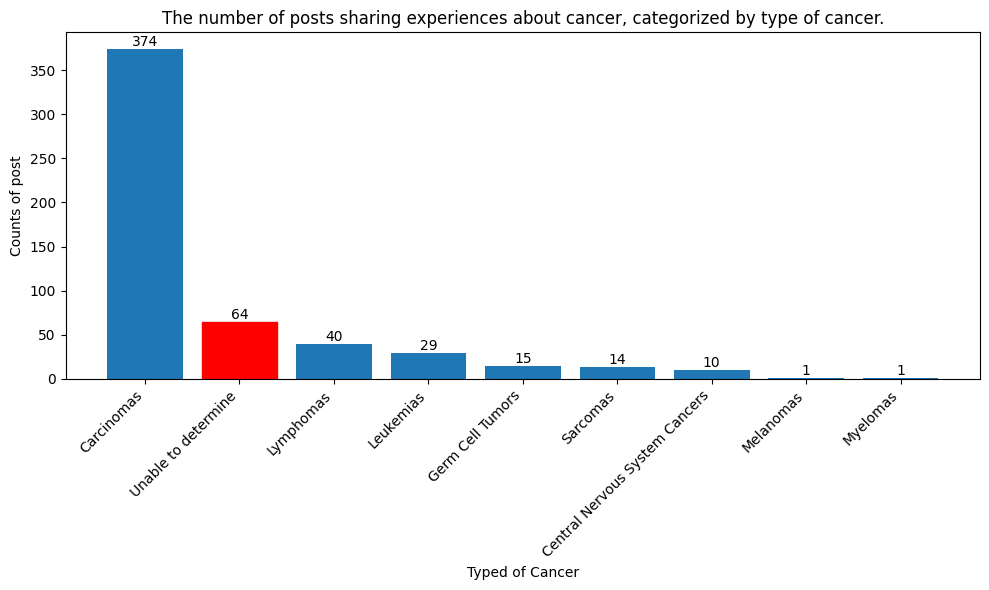

In [ ]:
# นับจำนวนโพสต์ในแต่ละ Type
type_counts = cancer_post_data['Typed of Cancer'].value_counts()

# สร้าง bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(type_counts.index, type_counts.values)

# กำหนดสีของแท่ง Unable to determine เป็นสีแดง
bars[type_counts.index.get_loc('Unable to determine')].set_color('red')

# แสดงตัวเลขจำนวนโพสต์บนแต่ละแท่ง
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             int(height), ha='center', va='bottom')

plt.xlabel('Typed of Cancer')
plt.ylabel('Counts of post')
plt.title('The number of posts sharing experiences about cancer, categorized by type of cancer.')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##**3.2)  Top 5 โพสต์บน  Facebook ที่ผู้คนให้ความสนใจ เกี่ยวกับแชร์ประสบการณ์โรคมะเร็ง**  

1.     จำแนกตามยอดไลค์ ( the number of likes)
2.   จำแนกตามยอดการตอบกลับ ( the number of replies)



In [ ]:
top_likes=cancer_post_data.sort_values(['Number of Likes'], ascending=[False])
top_replies=cancer_post_data.sort_values(['Number of Replies'], ascending=[False])

text1="<h3 style='font-size:26px;'><b> Top 5 : Post ที่มียอด likes สูงสุด</b></h3>"
text2="<h3 style='font-size:26px;'><b>Top 5 : Post ที่มียอด replies สูงสุด</b></h3>"
display(HTML(text1))
display(top_likes[['Account Name', 'Contents', 'Number of Likes','Cancer Name','Typed of Cancer']].iloc[:5])

display(HTML(text2))
display(top_replies[['Account Name', 'Contents', 'Number of Replies','Cancer Name','Typed of Cancer']].iloc[:5])

,Account Name,Contents,Number of Likes,Cancer Name,Typed of Cancer
3,Wansook Chompoo Ploy,มะเร็งปากมดลูกระยะCINlllเกือบเข้าระยะ1ตอนอายุ3...,1600,มะเร็งปากมดลูก,Carcinomas
5,Ize Atitya,ลูกสาว5ขวบเป็นมะเร็งสมองไม่มีอาการอะไรนอกจากน้...,1500,มะเร็งสมอง,Central Nervous System Cancers
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ระยะ3ตอนอายุ26พฤติกรรมคิดว่...,1400,มะเร็งลำไส้,Carcinomas
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูกOsteosarcomaช่วงเข่าอากา...,480,มะเร็งกระดูก,Sarcomas
46,Neung Lertsak,ผมเป็นมะเร็งเม็ดสีผิวหนังชนิดร้ายแรงMelanomaคร...,477,มะเร็งเม็ดสี,Melanomas


,Account Name,Contents,Number of Replies,Cancer Name,Typed of Cancer
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ระยะ3ตอนอายุ26พฤติกรรมคิดว่...,70,มะเร็งลำไส้,Carcinomas
3,Wansook Chompoo Ploy,มะเร็งปากมดลูกระยะCINlllเกือบเข้าระยะ1ตอนอายุ3...,44,มะเร็งปากมดลูก,Carcinomas
22,รมิตา ผู้หญิงที่เป็นของขวัญ,สำหรับมะเร็งปากมดลูกแนะนำให้ตรวจภายในเป็นประจำ...,31,มะเร็งปากมดลูก,Carcinomas
46,Neung Lertsak,ผมเป็นมะเร็งเม็ดสีผิวหนังชนิดร้ายแรงMelanomaคร...,30,มะเร็งเม็ดสี,Melanomas
113,Phacharatorn Subsiritavee,ผมเป็นมะเร็งลำไส้ใหญ่ระยะ3ปัจจุบันรักษาหายแล้ว,28,มะเร็งลำไส้,Carcinomas
